Graph with 143 nodes and 623 edges


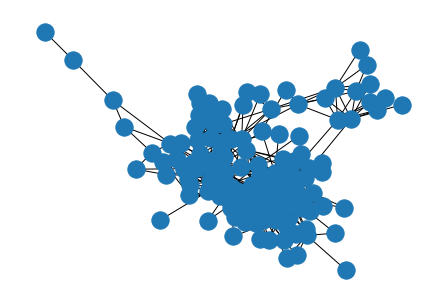

In [1]:
import networkx as nx
G=nx.read_edgelist('ia-enron-only.edges',nodetype=int)
print(nx.info(G))
nx.draw(G)

In [3]:
print(max(['apple','grape','carrot']))#defoult sort alphabetical
print(max(['apple','grape','carrot'],key=len))#sort by length

grape
carrot


In [5]:
highest_degree_node=max(G.nodes,key=G.degree)
highest_degree_node # 105 is node itself

105

In [6]:
G.degree(highest_degree_node)

42

In [10]:
betweenness=nx.centrality.betweenness_centrality(G)
highest_betweenness_node=max(G.nodes,key=betweenness.get)
highest_betweenness_node

105

In [13]:
betweenness[highest_betweenness_node]

0.19400604344556296

In [15]:
# the following code return error becouase This is because we need to provide a function to the key argument
max(G.nodes,key=betweenness)

TypeError: 'dict' object is not callable

In [25]:
degree_sequence=[G.degree(n) for n in G.nodes]

In [18]:
import statistics
print('Mean degree: ',statistics.mean(degree_sequence))
print('Median dgree: ',statistics.median(degree_sequence))

Mean degree:  8.713286713286713
Median dgree:  8


In [21]:
betweenness=nx.centrality.betweenness_centrality(G)
betweenness_sequence=list(betweenness.values())
print('Mean betweenness: ',statistics.mean(betweenness_sequence))
print('Median betweenness: ',statistics.median(betweenness_sequence))

Mean betweenness:  0.013950388838012454
Median betweenness:  0.0037492834763570323


In [26]:
from collections import Counter
degree_counts=Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [27]:
min_degree,max_degree=min(degree_counts.keys()),max(degree_counts.keys())
plotX=list(range(min_degree,max_degree+1))

In [29]:
plotY=[degree_counts.get(x,0) for x in plotX]

<BarContainer object of 42 artists>

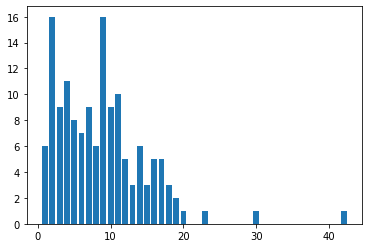

In [30]:
import matplotlib.pyplot as plt
plt.bar(plotX,plotY)

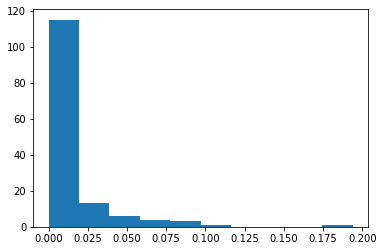

In [31]:
#When there are more x-values than you can comfortably display, or when your centrality measure is not discrete, as in the case of betweenness centrality, we can make use of histogram "binning." 
counts,bins,patchs=plt.hist(betweenness_sequence,bins=10)

In [32]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [33]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

In [34]:
nx.connected_components(G)

<generator object connected_components at 0x0000012980006BA0>

In [37]:
core=next(nx.connected_components(G))
core
#next return frist item in nx.connected_components(G) generator , that is largest item

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143}

In [38]:
len(core)

143

In [39]:
components=list(nx.connected_components(G))
len(components)

1

In [42]:
#Random failure
C=G.copy()
import random
print(len(C.nodes))
nodes_to_remove=random.sample(list(C.nodes),2)
C.remove_nodes_from(nodes_to_remove)
print(len(C.nodes))

143
141


In [46]:
number_of_steps=25
M=G.number_of_nodes()//number_of_steps
M

5

In [47]:
# define  a sequence of the total number of nodes removed at each step
num_nodes_removed=range(0,G.number_of_nodes(),M)

In [48]:
N=G.number_of_nodes()
C=G.copy()
random_attack_core_proportions=[]
for node_removed in num_nodes_removed:
    core=next(nx.connected_components(C))
    core_proportions=len(core)/N
    random_attack_core_proportions.append(core_proportions)
    if C.number_of_nodes()>M:
        nodes_to_remove=random.sample(list(C.nodes),M)
        C.remove_nodes_from(nodes_to_remove)

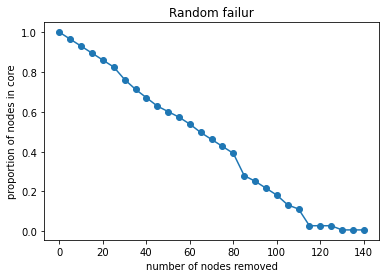

In [51]:
plt.title('Random failur')
plt.xlabel('number of nodes removed')
plt.ylabel('proportion of nodes in core')
plt.plot(num_nodes_removed,random_attack_core_proportions,marker='o')